# **Author : ROHIT WADHAVE**
###  **LetsGrowMore** - Data Science 
#####            *(FEBRUARY'22)*



# Task 1 : Iris Flowers Classification Machine Learning Project  


## **Read the csv dataset as a pandas dataframe.**

In [1]:
from google.colab import files
uploaded_files = files.upload()

Saving iris (2).csv to iris (2) (2).csv


## **Importing all libraries required in this notebook**

In [2]:
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

sns.set_style('darkgrid')

In [3]:
data = pd.read_csv(r"Iris.csv")

## **Data Understanding**

In [4]:
pd.concat([data.head(),data.tail()])      # Show top 5 & bottom 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
data.sample(10)      # Look at the random 10 records in the apps dataframe

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
12,13,4.8,3.0,1.4,0.1,Iris-setosa
90,91,5.5,2.6,4.4,1.2,Iris-versicolor
91,92,6.1,3.0,4.6,1.4,Iris-versicolor
80,81,5.5,2.4,3.8,1.1,Iris-versicolor
131,132,7.9,3.8,6.4,2.0,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
69,70,5.6,2.5,3.9,1.1,Iris-versicolor
81,82,5.5,2.4,3.7,1.0,Iris-versicolor
39,40,5.1,3.4,1.5,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa


In [6]:
data.columns     # Series of dataset columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
data.rename(columns={'SepalLengthCm':'Sepal_length', 'SepalWidthCm':'Sepal_width', 'PetalLengthCm':'Petal_length', 'PetalWidthCm':'Petal_width'},inplace=True)

In [8]:
data.shape

(150, 6)

In [9]:
data.columns

Index(['Id', 'Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width',
       'Species'],
      dtype='object')

In [10]:
data.describe()   #Statistical information of dataset

,Id,Sepal_length,Sepal_width,Petal_length,Petal_width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            150 non-null    int64  
 1   Sepal_length  150 non-null    float64
 2   Sepal_width   150 non-null    float64
 3   Petal_length  150 non-null    float64
 4   Petal_width   150 non-null    float64
 5   Species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [12]:
# This custom user defined function will give the datatype,count of null & non null values, count of Unique values present in dataset in the form of dataframe

def datainfo():
  df_temp = pd.DataFrame(index=data.columns)
  df_temp["Null value"] = df_temp.isnull().sum()
  df_temp["% of the Null value"] = df_temp.isnull().mean()*100
  df_temp["Not Null value"] = df_temp.count()
  df_temp["Unique count"] = df_temp.nunique()
  df_temp["Datatype"] = df_temp.dtypes
  
  return df_temp

datainfo()

,Null value,% of the Null value,Not Null value,Unique count,Datatype
Id,NaN,NaN,NaN,NaN,NaN
Sepal_length,NaN,NaN,NaN,NaN,NaN
Sepal_width,NaN,NaN,NaN,NaN,NaN
Petal_length,NaN,NaN,NaN,NaN,NaN
Petal_width,NaN,NaN,NaN,NaN,NaN
Species,NaN,NaN,NaN,NaN,NaN


In [13]:
## count the species present in species column
data.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [14]:
#Check if the duplicate values are present in the dataset.
data[data.duplicated()]      # No duplicate value present in the dataset.

,Id,Sepal_length,Sepal_width,Petal_length,Petal_width,Species


***------>   So, since there is no null value and duplicates present in the  Dataset so, we are now safe to visualize our data.***

## **Data Visualization**

Text(0.5, 0, 'Sepal_length')

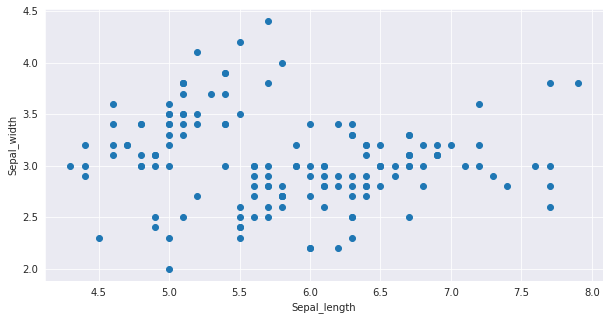

In [15]:
plt.figure(figsize=(10, 5))
plt.scatter(data['Sepal_length'], data['Sepal_width'])
plt.ylabel('Sepal_width')
plt.xlabel('Sepal_length')

Text(0.5, 0, 'Petal_length')

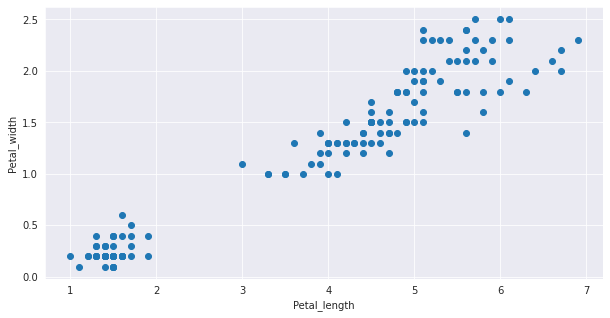

In [16]:
plt.figure(figsize=(10, 5))
plt.scatter(data['Petal_length'], data['Petal_width'], marker='o')
plt.ylabel('Petal_width')
plt.xlabel('Petal_length')

In [17]:
data.dropna(inplace=True)

In [18]:
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [19]:
## converting species into label encoding

def map_species(f):
    if f == 'setosa':
        f = 0
    elif f == 'versicolor':
        f = 1
    elif f == 'virginica':
        f = 2
    return f

In [20]:
data['Species'] = data.Species.map(map_species)

In [21]:
data.head()

,Id,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

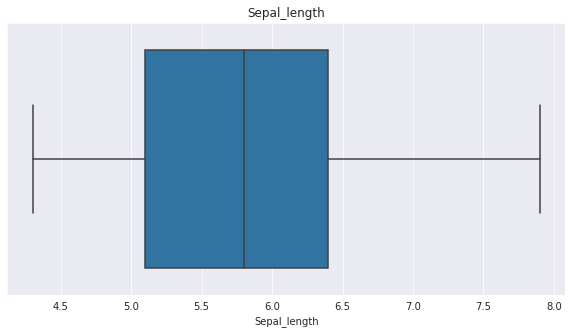

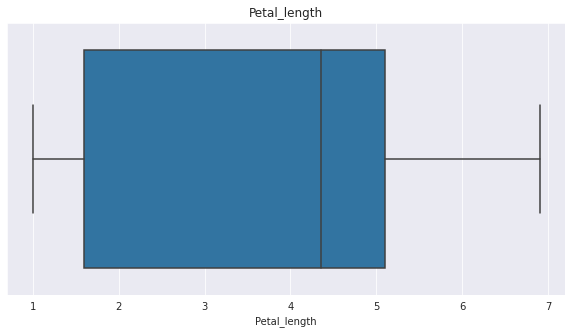

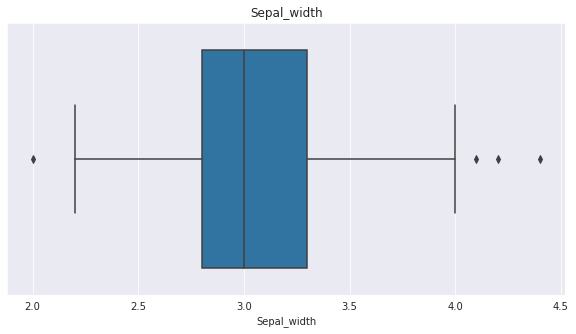

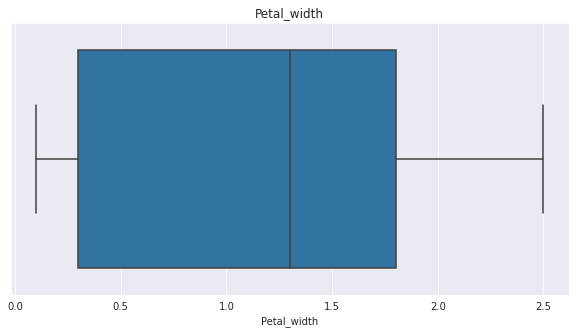

In [22]:
for f in ['Sepal_length', 'Petal_length', 'Sepal_width', 'Petal_width']:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data[f])
    plt.title(f)

In [23]:
## independent and dependent features

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [24]:
## preprocessing

sc = StandardScaler()
X = sc.fit_transform(X)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [26]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(112, 5) (38, 5) (112,) (38,)


In [27]:
lg = LogisticRegression()

In [28]:
lg.fit(X_train, y_train)

LogisticRegression()

In [29]:
pred = lg.predict(X_test)

--------------------------------------------Classification Report---------------------------------------------
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38

------------------------------------------Accuracy Score---------------------------------------------------------
1.0
--------------------------------------------Confustion Matrix-----------------------------------------------------


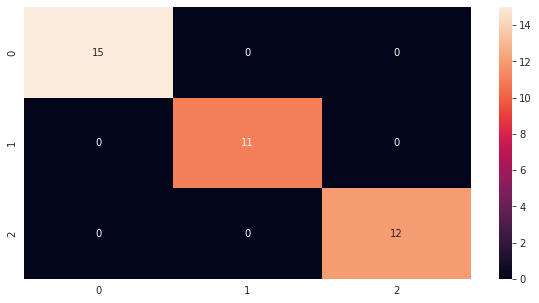

In [30]:
print("--------------------------------------------Classification Report---------------------------------------------")
print(classification_report(y_test, pred))

print("------------------------------------------Accuracy Score---------------------------------------------------------")
print(accuracy_score(y_test, pred))

print("--------------------------------------------Confustion Matrix-----------------------------------------------------")
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test, pred), annot=True);

In [31]:
pd.DataFrame({'Actual': y_test,  'Predicted': pred}).head(40)

,Actual,Predicted
0,Iris-versicolor,Iris-versicolor
1,Iris-setosa,Iris-setosa
2,Iris-virginica,Iris-virginica
3,Iris-versicolor,Iris-versicolor
4,Iris-versicolor,Iris-versicolor
5,Iris-setosa,Iris-setosa
6,Iris-versicolor,Iris-versicolor
7,Iris-virginica,Iris-virginica
8,Iris-versicolor,Iris-versicolor
9,Iris-versicolor,Iris-versicolor
